# Overview of raw data (part 1) 
+ Generate the overview of data
+ Check whether the training set is consistent with testing set

In [5]:
import numpy as np
import pandas as pd
# import pandas_profiling
import sklearn
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # hist to '%''

%matplotlib inline

---

## 1. Overview of the raw data
+ pandas_profiling: generate the overview of data and save as html

In [8]:
# read submission sample
df_kaggle_sample = pd.read_csv("data/Assignment3_Random_Sample-Kaggle.csv")
df_kaggle_sample.head(3)

,row ID,Final_Y
0,1,0
1,2,0
2,3,1


+ 看上去这个kaggle数据集提供的是对测试集的预测结果, 之后这个结果上传到kaggle网站上和真实的结果比较得到评分, 从Final_Y列可以看出来是二分类问题
+ 既然是random data, 这个数据集用处不大, 只是提供个格式对照, 我们只要关注training和testing数据集就好

In [4]:
# profile = pandas_profiling.ProfileReport(df_kaggle_sample)
# profile
# profile.to_file("html/df_kaggle_preview.html")

### 1.1 Training set
+ 总共20个attributes, target名为"Final_Y"

In [9]:
df_train = pd.read_csv("data/Assignment3_TrainingSet.csv")
df_train.head(3)

,row ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Final_Y
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,2,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [6]:
# profile = pandas_profiling.ProfileReport(df_train)
# profile
# profile.to_file("html/df_training.html")

### 1.2 Testing set

In [10]:
df_test = pd.read_csv("data/Assignment3_TestingSet.csv")
df_test.head(3)

,row ID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,37,services,married,high.school,no,yes,no,telephone,may,...,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,2,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,...,146,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,3,54,management,married,basic.4y,unknown,yes,no,telephone,may,...,230,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [8]:
# profile = pandas_profiling.ProfileReport(df_test)
# profile
# profile.to_file("html/df_testing.html")

--- 
## 2. Overview of the dataset

### 2.1 age

In [12]:
# change y-axis to percentage
def to_percent(y, position):
    return "{:.2f}%".format(100*y)

In [13]:
# for all continuous attributes, training set and testing set 
def check_hist(df_train,df_test,attribute,bins=20,percent=False,xlim=(15,95),ylim=None):
    plt.figure(figsize=(16,8))
    # train
    plt.subplot(221)
    if not percent:
        plt.hist(df_train[attribute], bins=bins, color='steelblue')
    else:
        num_samples = df_train.shape[0]
        plt.hist(df_train[attribute], bins=bins, color='steelblue', weights= [1./ num_samples] * num_samples)
        formatter = FuncFormatter(to_percent)
        plt.gca().yaxis.set_major_formatter(formatter)
    plt.title("train {}".format(attribute))
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlim(xlim)
    
    # test
    plt.subplot(222)
    if not percent:
        plt.hist(df_test[attribute], bins=bins, color='steelblue')
    else:
        num_samples = df_test.shape[0]
        plt.hist(df_test[attribute], bins=bins, color='steelblue', weights= [1./ num_samples] * num_samples)
        formatter = FuncFormatter(to_percent)
        plt.gca().yaxis.set_major_formatter(formatter)
    plt.title("test {}".format(attribute))
    if ylim is not None:
        plt.ylim(ylim)
    plt.xlim(xlim)
    plt.show()

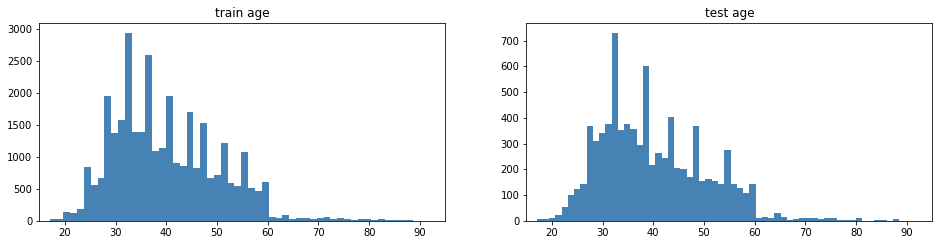

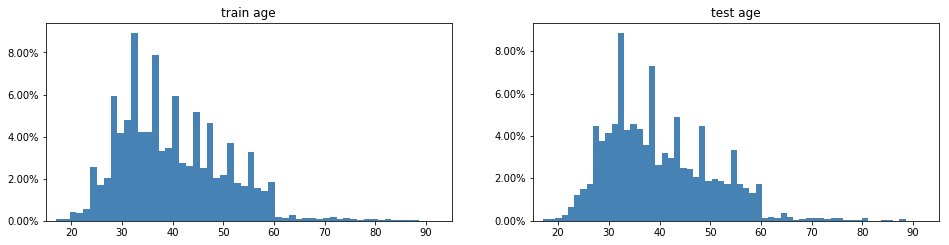

In [14]:
check_hist(df_train,df_test,attribute="age",bins=60,percent=False,xlim=(15,95))
check_hist(df_train,df_test,attribute="age",bins=60,percent=True,xlim=(15,95))

### 2.2 campaign
+ 参加活动的次数, 没有0, 没有缺失值
+ 参加过1次的占绝大多数, 最多参加约35-40次

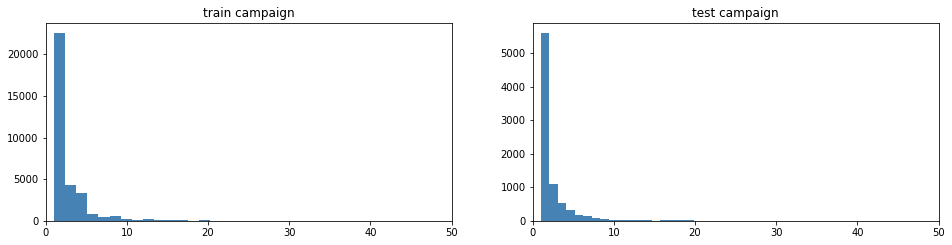

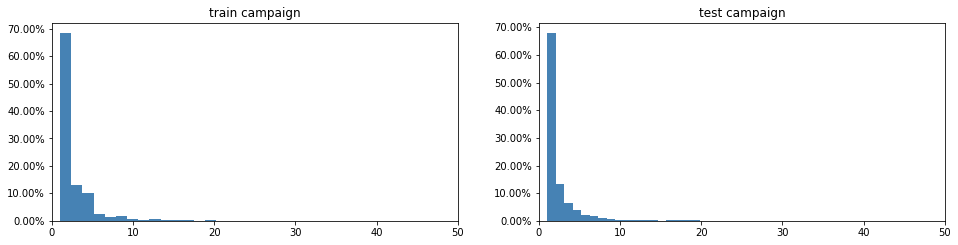

In [17]:
check_hist(df_train,df_test,attribute="campaign",bins=40,percent=False,xlim=(0,50))
check_hist(df_train,df_test,attribute="campaign",bins=40,percent=True,xlim=(0,50))

In [22]:
for i in range(5,11):
    a = df_train[df_train['campaign'] > i].shape[0] * 100. / df_train.shape[0]
    b = df_test[df_test['campaign'] > i].shape[0] * 100. / df_test.shape[0]
    print("More than {}: TrainingSet  {:.2f}%    |    TestingSet  {:.2f}%".format(i,a,b))
    print("-----")

More than 5: TrainingSet  8.21%    |    TestingSet  8.25%
-----
More than 6: TrainingSet  5.79%    |    TestingSet  6.05%
-----
More than 7: TrainingSet  4.31%    |    TestingSet  4.32%
-----
More than 8: TrainingSet  3.33%    |    TestingSet  3.41%
-----
More than 9: TrainingSet  2.64%    |    TestingSet  2.72%
-----
More than 10: TrainingSet  2.07%    |    TestingSet  2.27%
-----


### 2.3 cons.conf.idx
+ 语义信息类似消费者信息指数, 是离散的26个数值
+ 没有缺失值, 数值之间差别很大, 可以考虑直接用26个分类

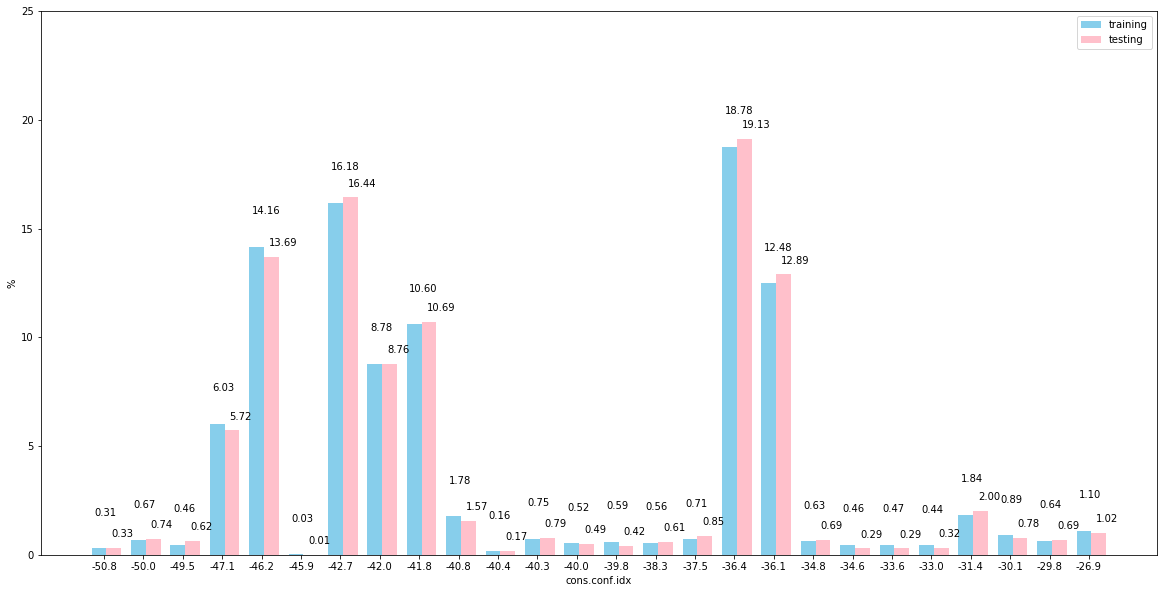

In [24]:
ticks = sorted(list(set(df_train['cons.conf.idx'])))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['cons.conf.idx'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['cons.conf.idx'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,25)
plt.xticks(training_x + 1, ticks)
plt.xlabel('cons.conf.idx')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.4 cons.price.idx
+ 消费者价格指数, 和消费者信息指数类似, 也是26个离散数据
+ 没有缺失值, 考虑直接用26个分类

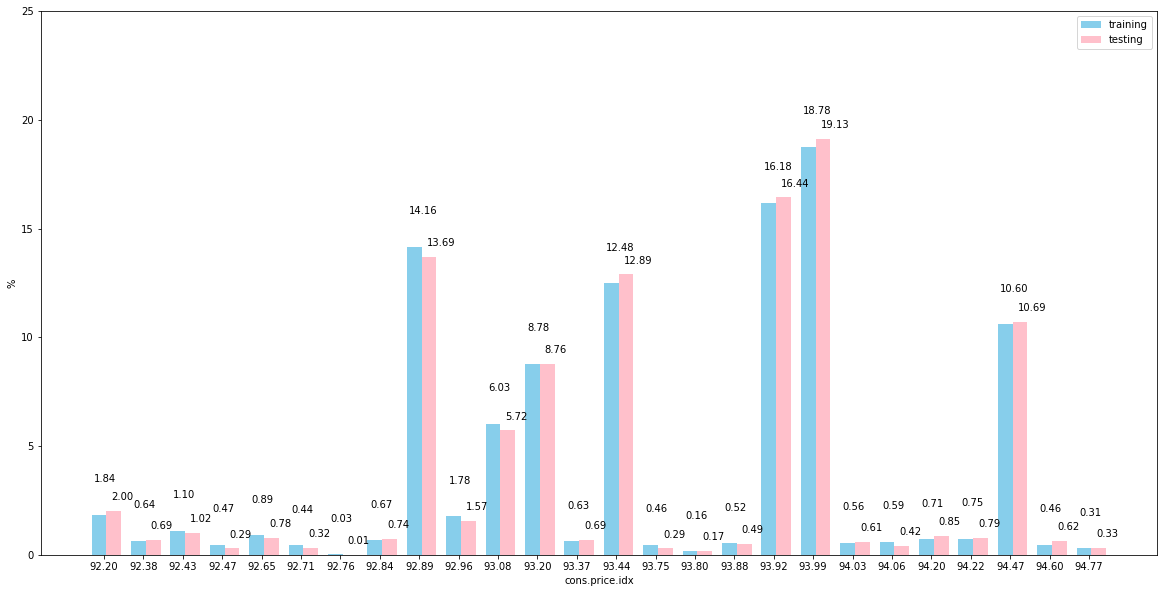

In [26]:
ticks = sorted(list(set(df_train['cons.price.idx'])))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['cons.price.idx'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['cons.price.idx'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,25)
plt.xticks(training_x + 1, ["{:.2f}".format(i) for i in ticks])
plt.xlabel('cons.price.idx')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.5 contact

|xxx|training set|testing set|
|-----|-----|-----|
|cellular|63.5%|36.5%|
|telephone|63.4%|36.6%|

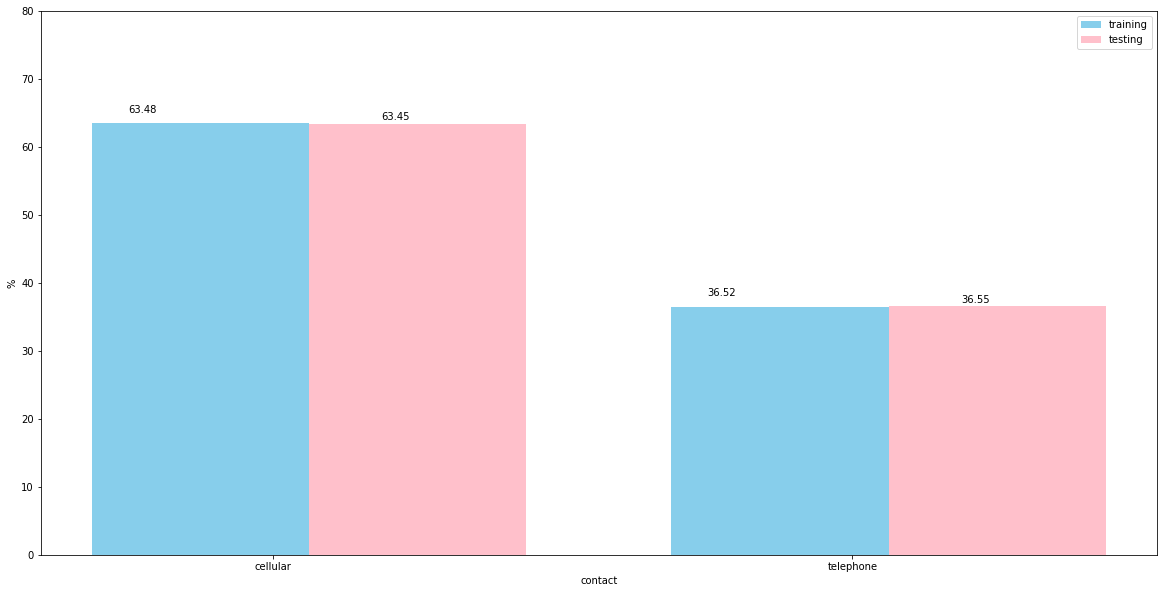

In [36]:
ticks = ['cellular','telephone']
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['contact'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['contact'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,80)
plt.xticks(training_x + 1, ticks)
plt.xlabel('contact')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.6 day_of_week

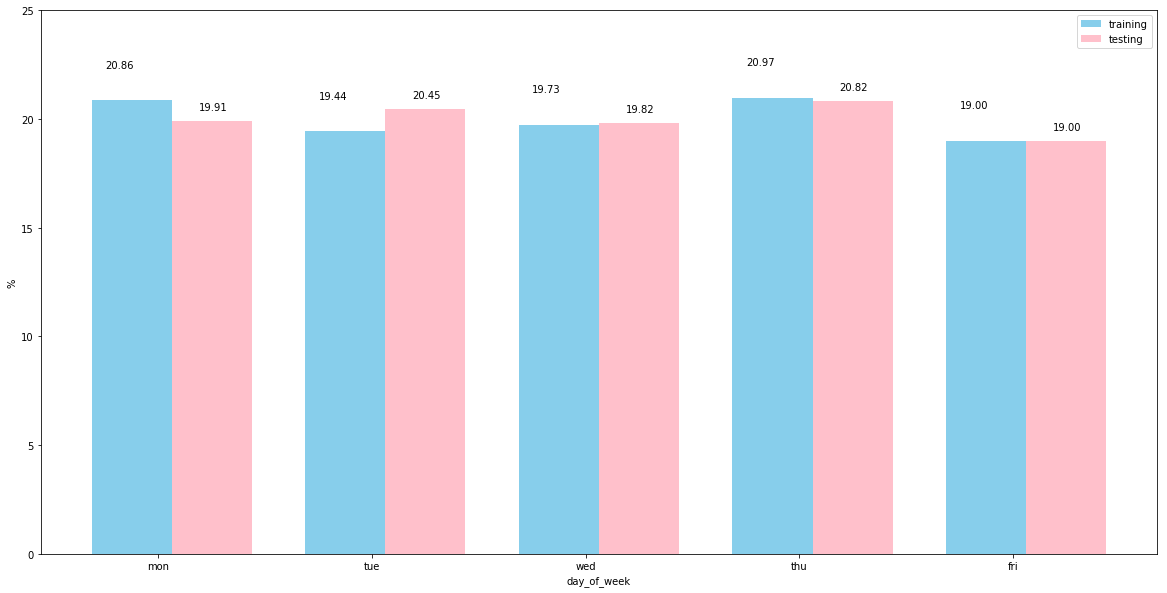

In [35]:
ticks = ['mon','tue','wed','thu','fri']
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['day_of_week'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['day_of_week'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,25)
plt.xticks(training_x + 1, ticks)
plt.xlabel('day_of_week')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.7 default

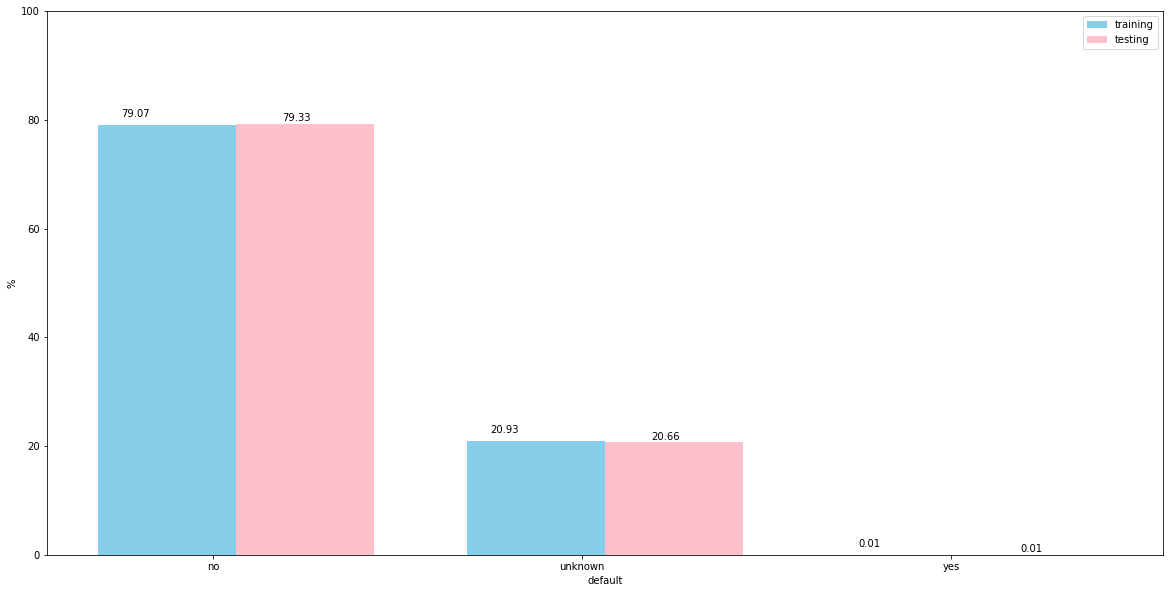

In [33]:
ticks = sorted(list(set(df_train['default'])))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['default'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['default'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,100)
plt.xticks(training_x + 1, ticks)
plt.xlabel('default')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.8 duration
+ 通话时长, 可比较数值 (类似年龄)

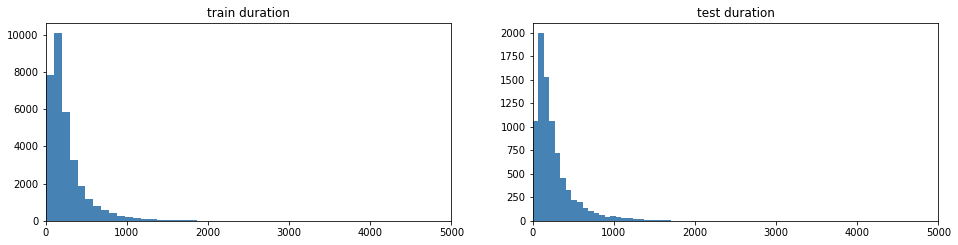

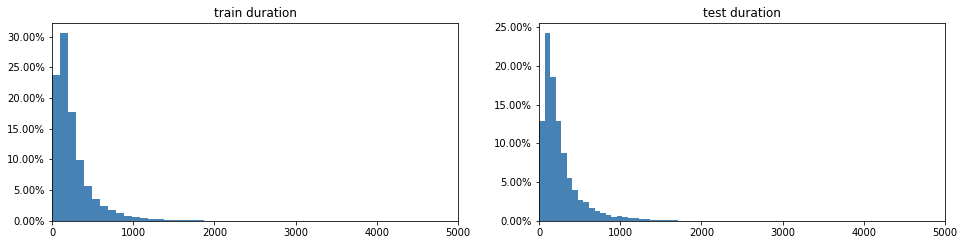

In [30]:
# 绝对数量 absolute quantity
check_hist(df_train,df_test,attribute="duration",bins=50,percent=False,xlim=(0,5000))
# 百分比  percentage
check_hist(df_train,df_test,attribute="duration",bins=50,percent=True,xlim=(0,5000))

### 2.9 education

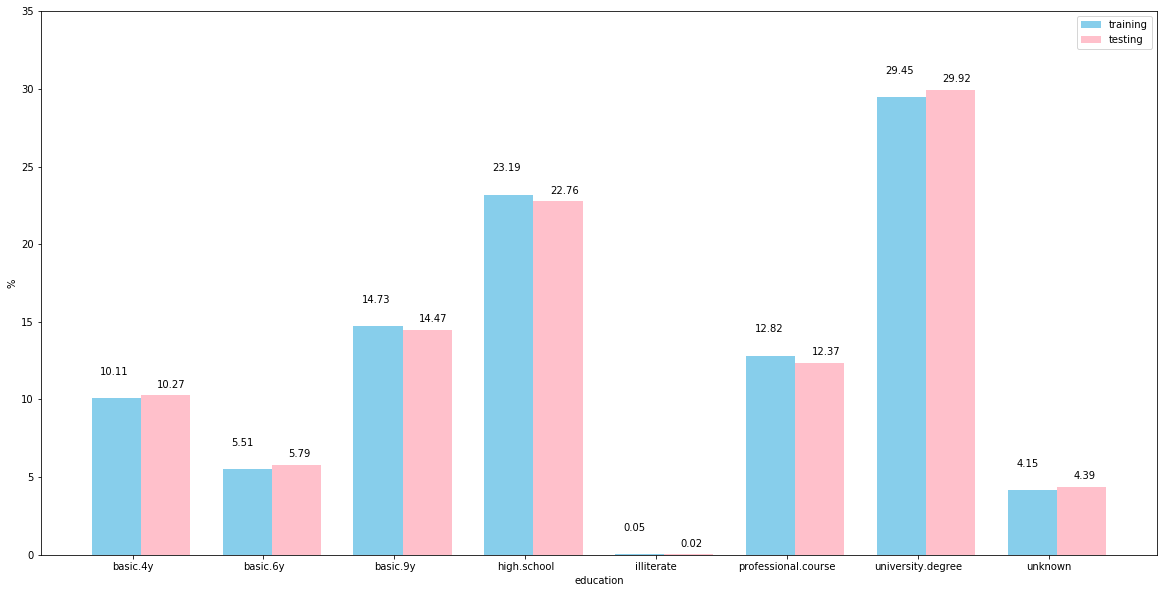

In [31]:
ticks = sorted(list(set(df_train['education'])))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['education'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['education'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,35)
plt.xticks(training_x + 1, ticks)
plt.xlabel('education')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.10 emp.var.rate
+ 10 values

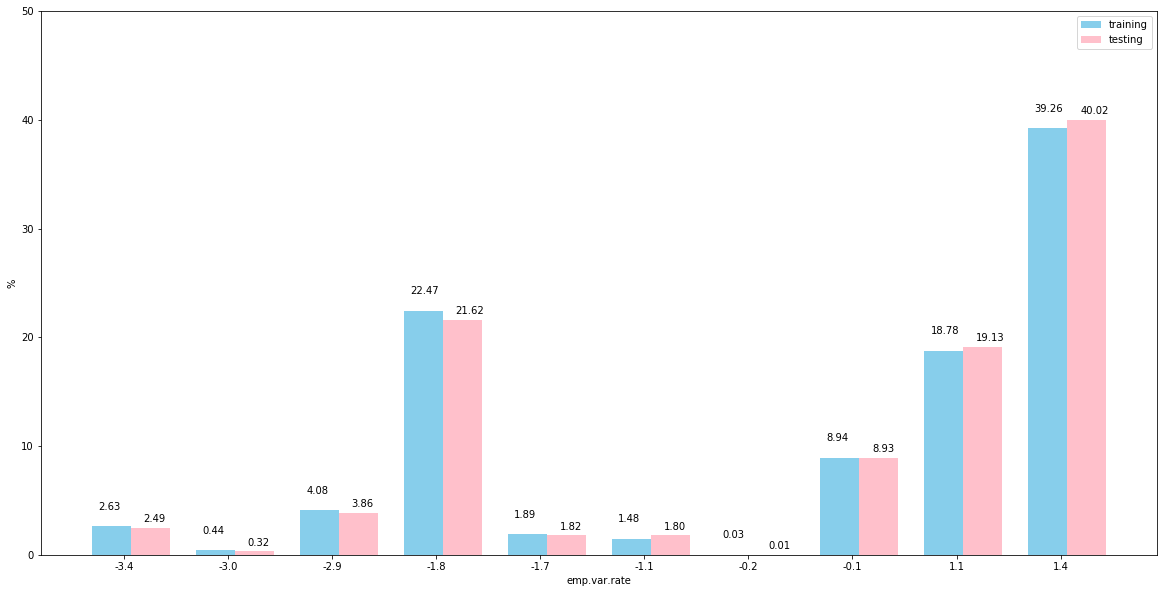

In [37]:
ticks = sorted(list(set(df_train['emp.var.rate'])))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['emp.var.rate'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['emp.var.rate'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,50)
plt.xticks(training_x + 1, ticks)
plt.xlabel('emp.var.rate')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.11 euribor3m
+ high corelation with other attributes ( emp.var.rate0.97)

### 2.12 housing

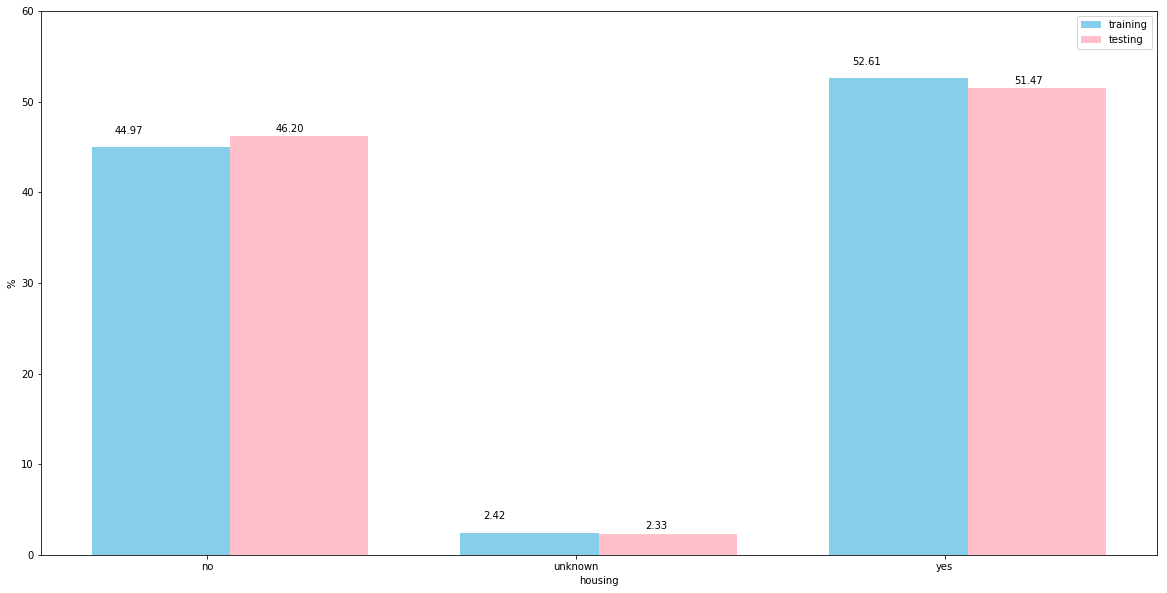

In [38]:
ticks = sorted(list(set(df_train['housing'])))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['housing'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['housing'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,60)
plt.xticks(training_x + 1, ticks)
plt.xlabel('housing')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.13 job

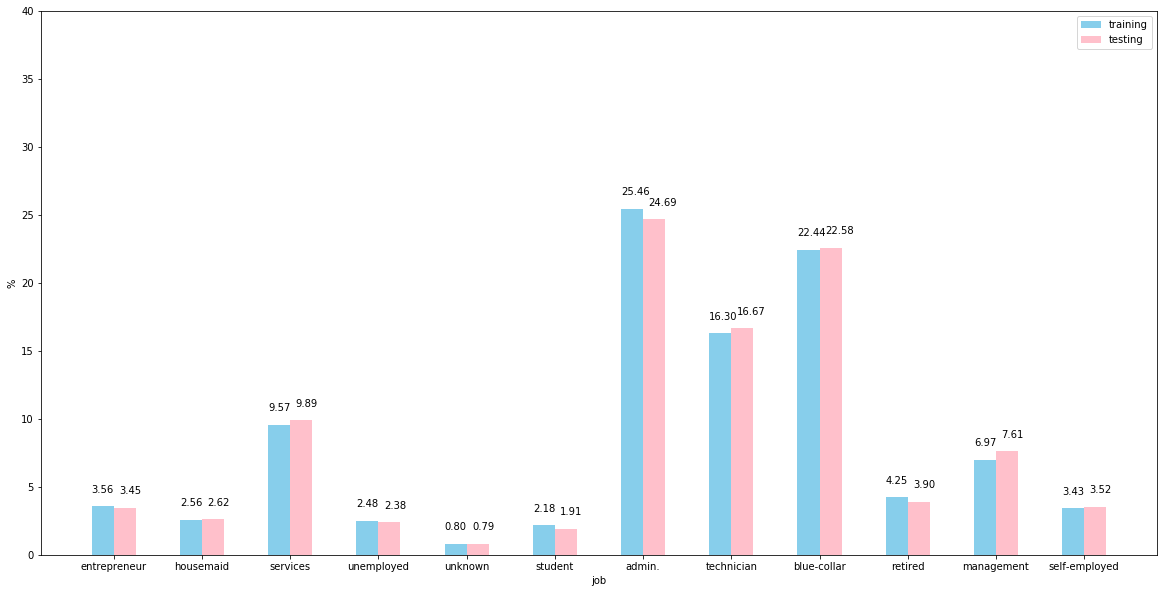

In [39]:
ticks = list(set(df_train['job']))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['job'] == ticks[i]].shape[0] * 100. / 32950)
    testing_y.append(df_test[df_test['job'] == ticks[i]].shape[0] * 100. / 8238)

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 2

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=2, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=2, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,40)
plt.xlim
plt.xticks(training_x + 1, ticks)
plt.xlabel('job')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+1,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.14 loan

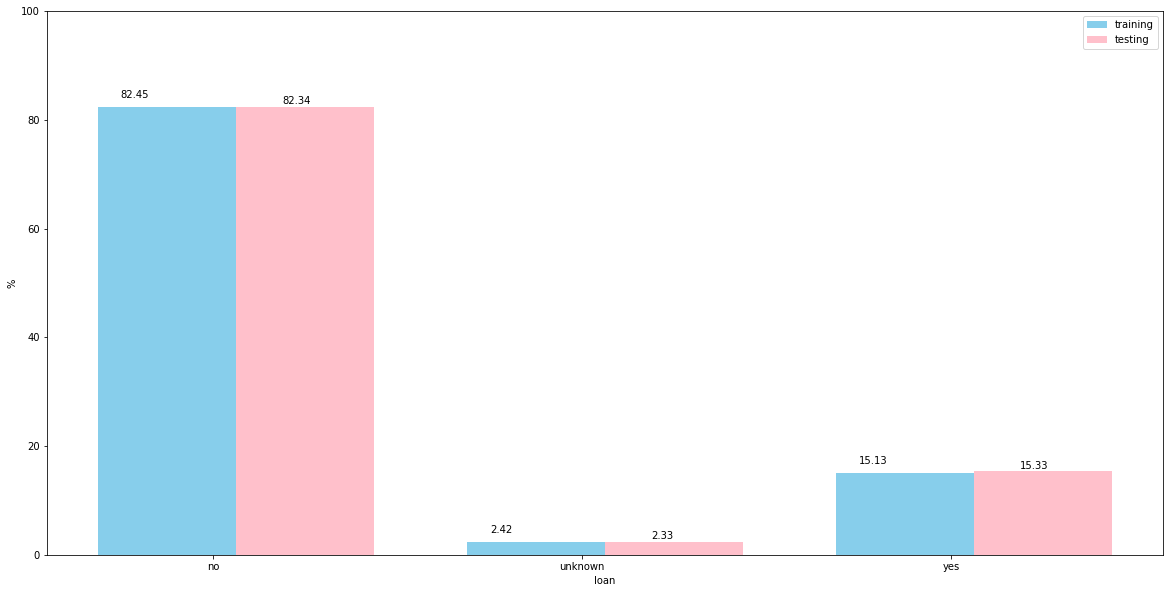

In [40]:
ticks = sorted(list(set(df_train['loan'])))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['loan'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['loan'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 3

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=3, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=3, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,100)
plt.xticks(training_x + 1, ticks)
plt.xlabel('loan')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1.5,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+0.5,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.15 martial
+ 婚否数据

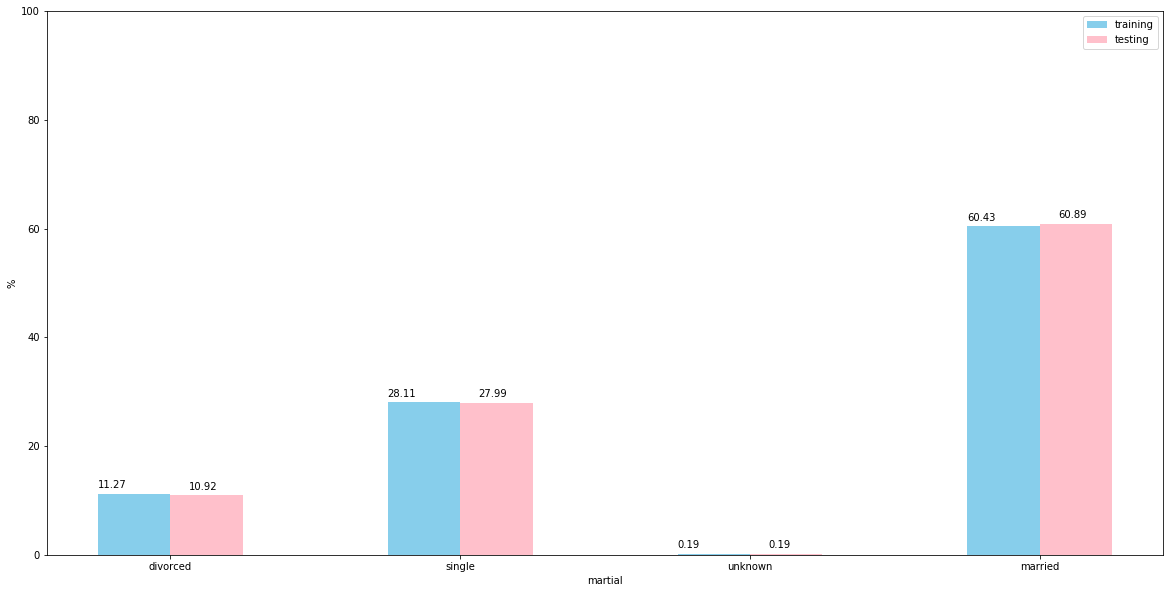

In [41]:
ticks = list(set(df_train['marital']))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['marital'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['marital'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 2

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=2, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=2, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,100)
plt.xlim
plt.xticks(training_x + 1, ticks)
plt.xlabel('martial')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+1,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.16 month

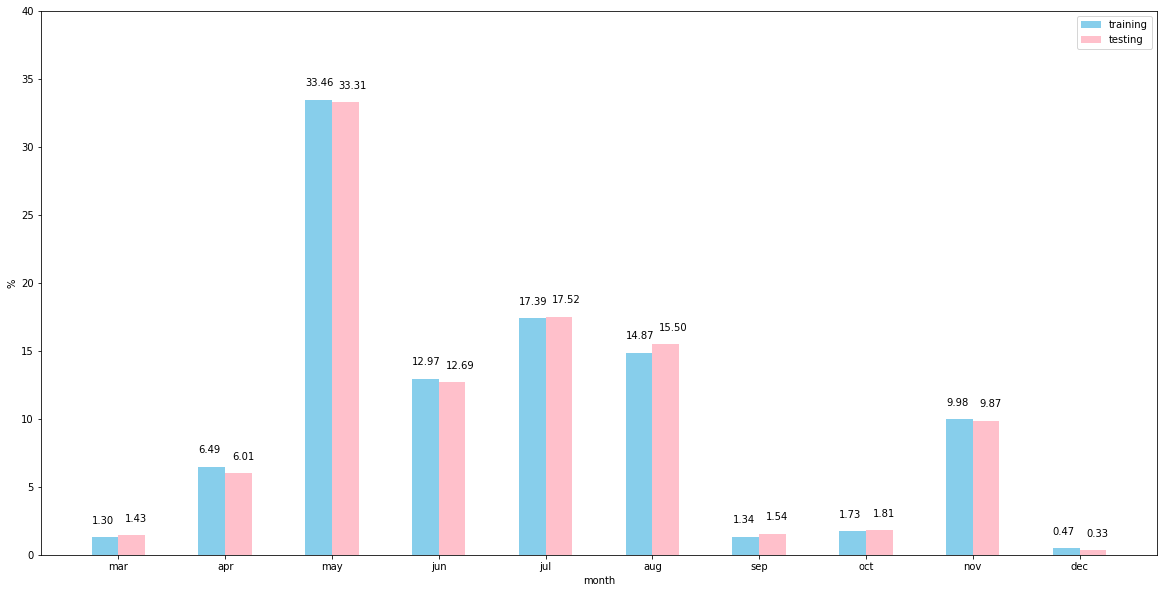

In [42]:
ticks = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['month'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['month'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 2

plt.figure(figsize=(20,10))
plt.bar(training_x, training_y, width=2, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=2, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,40)
plt.xlim
plt.xticks(training_x + 1, ticks)
plt.xlabel('month')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+1,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.17 nr.employed
+ highly correlated with euribor3m

### 2.18 pdays
+ 距离上一次活动的天数, 大量数据为上限(>999, i.e. 从未参加过)

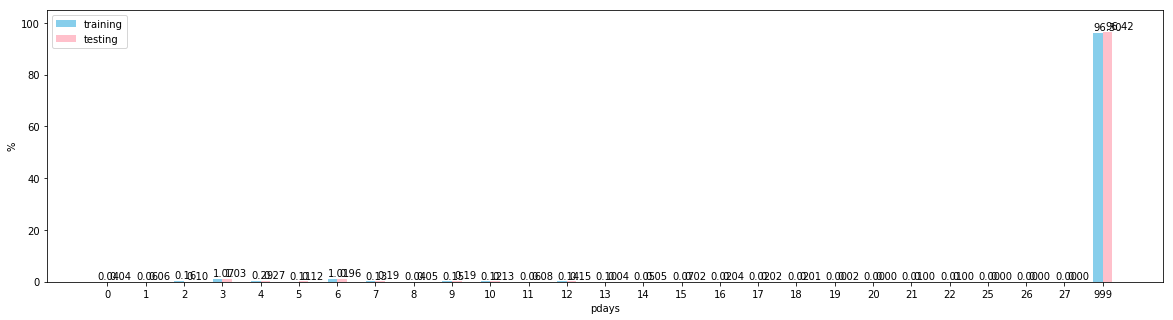

In [44]:
ticks = list(set(df_train['pdays']))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['pdays'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['pdays'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 2

plt.figure(figsize=(20,5))
plt.bar(training_x, training_y, width=2, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=2, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,105)
plt.xlim
plt.xticks(training_x + 1, ticks)
plt.xlabel('pdays')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+1,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.19 poutcome
+ 上一次活动的结果: 大多数人不存在

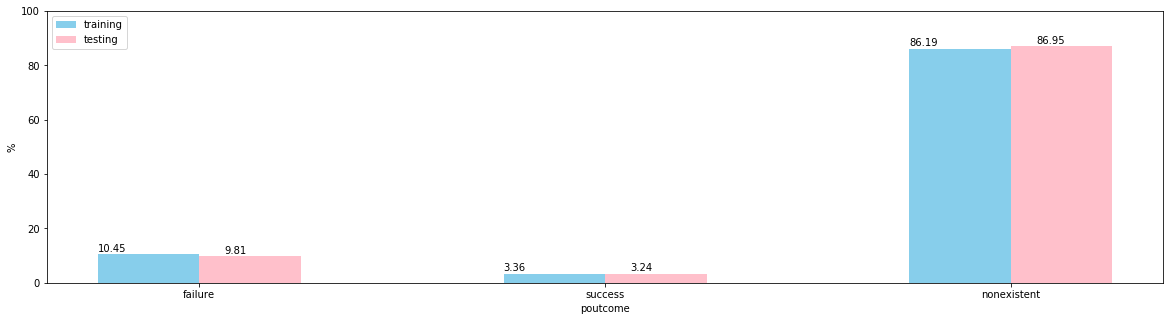

In [45]:
ticks = list(set(df_train['poutcome']))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['poutcome'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['poutcome'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 2

plt.figure(figsize=(20,5))
plt.bar(training_x, training_y, width=2, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=2, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,100)
plt.xlim
plt.xticks(training_x + 1, ticks)
plt.xlabel('poutcome')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+1,s="{:.2f}".format(testing_y[i]))
plt.show()

### 2.20 previous
+ 之前参加过活动的次数, 大多数人没参加过

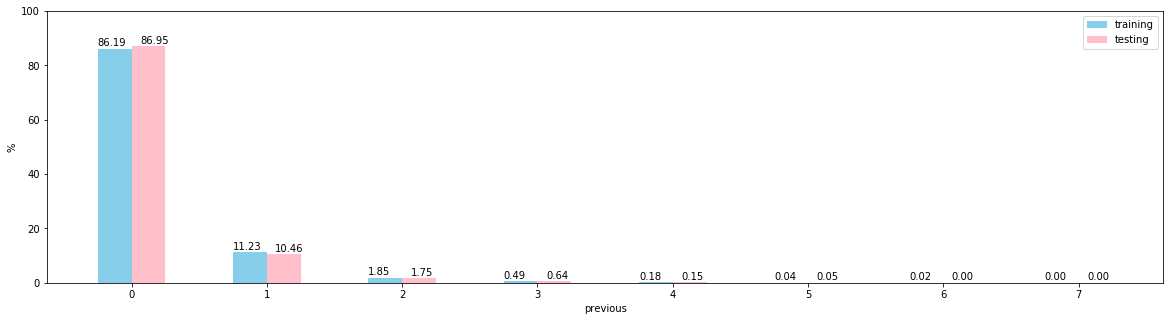

In [46]:
ticks = list(set(df_train['previous']))
training_y = []
testing_y = []
for i in range(len(ticks)):
    training_y.append(df_train[df_train['previous'] == ticks[i]].shape[0] * 100. / df_train.shape[0])
    testing_y.append(df_test[df_test['previous'] == ticks[i]].shape[0] * 100. / df_test.shape[0])

training_y = np.array(training_y)
testing_y = np.array(testing_y)
training_x = np.arange(training_y.shape[0]) * 8
testing_x = training_x + 2

plt.figure(figsize=(20,5))
plt.bar(training_x, training_y, width=2, color='skyblue', label='training')
plt.bar(testing_x, testing_y, width=2, color='pink', label='testing')
plt.ylabel('%')
plt.ylim(0,100)
plt.xlim
plt.xticks(training_x + 1, ticks)
plt.xlabel('previous')
plt.legend()
for i in range(len(ticks)):
    plt.text(training_x[i]-1,training_y[i]+1,s="{:.2f}".format(training_y[i]))
    plt.text(testing_x[i]-0.5,testing_y[i]+1,s="{:.2f}".format(testing_y[i]))
plt.show()

## Conclusion
+ The dataset is unbalanced (from generated HTMLs)
+ The training set is consistent with testing set